In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr 
import matplotlib.pyplot as plt

In [2]:
coo = pd.read_csv("chr21_25k.txt", header = None, sep = "\t")
resolution = 25000
coo.columns = ['source', 'target', 'weight']
coo[['source','target']] = coo[['source','target']] / resolution

In [3]:
expected_contacts = coo.groupby(abs(coo['target']-coo['source']), as_index=True).sum()
expected_contacts['weight'] = expected_contacts['weight'] / (1924-expected_contacts.index.to_series())

In [4]:
#expected_contacts = coo.groupby(abs(coo['target']-coo['source']), as_index=True).sum()
coo['weight'] = coo['weight'] / expected_contacts.loc[abs(coo['target']-coo['source']),'weight'].values

In [5]:
#coo_matrix = nx.from_pandas_edgelist(coo,source='source',target='target',edge_attr='weight')
coo_matrix = np.zeros(shape=(1924,1924), dtype=float)
weight_list = coo['weight'].ravel()
weight_list[np.isnan(weight_list)] = 0
coo_matrix[coo['source'].ravel().astype(int)-1,coo['target'].ravel().astype(int)-1] = weight_list
coo_matrix = coo_matrix + coo_matrix.T - np.diag(np.diag(coo_matrix))

In [8]:
corr_matrix = np.corrcoef(coo_matrix)

/home/nedooshki/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[:, None]
/home/nedooshki/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/nedooshki/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[None, :]
/home/nedooshki/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [22]:
undiagonal = corr_matrix[np.where(~np.eye(corr_matrix.shape[0],dtype=bool))]
undiagonal[undiagonal< -0.13]

/home/nedooshki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


array([-0.1324803 , -0.13547465, -0.13092258, -0.1324803 , -0.13547465,
       -0.13092258])

/home/nedooshki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/nedooshki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


584 886
(0.41283719371498384, 4.5563546380844226e-80)
0.4128371937149842


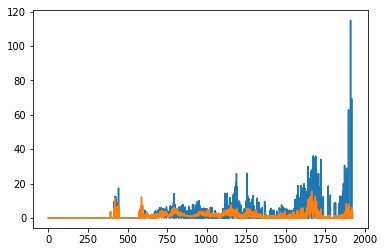

In [38]:
pos1 = np.where(corr_matrix>0.4)[1]
pos0 = np.where(corr_matrix>0.4)[0]
np.where((pos1-pos0) > 200)
print(pos0[71],pos1[71])
print(pearsonr(coo_matrix[584,],coo_matrix[886,]))
print(corr_matrix[584,886])
plt.plot(coo_matrix[584,])
plt.plot(coo_matrix[886,])
plt.show()

In [46]:
coo_matrix[584,1916]


TypeError: unsupported operand type(s) for &: 'int' and 'str'

In [152]:
K = coo_matrix.shape[0]
correl = np.empty((K,K), dtype=float)
p_vals = np.empty((K,K), dtype=float)
for i, ac in enumerate(coo_matrix):
    for j, bc in enumerate(coo_matrix):
        if i > j:
            continue
        else:
            corr = pearsonr(ac, bc)
            #corr = stats.kendalltau(ac, bc)

        correl[i,j] = corr[0]
        correl[j,i] = corr[0]
        p_vals[i,j] = corr[1]
        p_vals[j,i] = corr[1]

/home/nedooshki/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [158]:
p_vals[375,375]

0.0

No handles with labels found to put in legend.


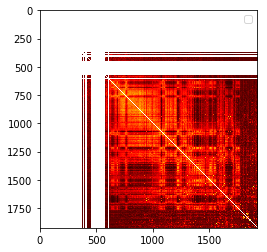

In [47]:
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.legend()
plt.show()

No handles with labels found to put in legend.


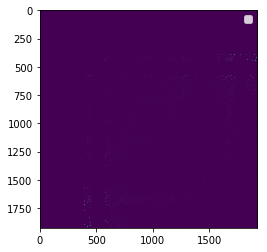

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  3.95717713,  8.48742235,  0.        ,  0.        ,
         3.24421156,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  8.48742235,  3.99704198,  0.        ,  1.64568721,
         0.65452203,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.71751159,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  

In [52]:
plt.imshow(coo_matrix)
plt.legend()
plt.show()
coo_matrix[380:400,380:400]

In [54]:
corr_matrix2 = pd.DataFrame(corr_matrix)

In [55]:
corr_coo = corr_matrix2.rename_axis('source').reset_index().melt('source', value_name='weight', var_name='target').dropna()

In [57]:
corr_coo.to_csv('corr_chr21.txt', header=None, index=None, sep=' ', mode='a')

In [140]:
coo.shape

(738764, 3)

In [141]:
1900*1900

3610000